# Regressão Linear

A regressão linear é uma ferramenta estatística usada para estimar o valor de uma variável contínua Y, conhecida como variável dependente ou resposta, a partir dos valores de uma ou mais variáveis X, chamadas de independentes ou preditoras. Em termos simples, essa técnica busca definir uma equação linear que represente da melhor forma possível a relação entre X e Y, possibilitando previsões futuras de Y com base em novos valores de X.

Seu uso é bastante variado, incluindo aplicações como a projeção de vendas futuras de uma empresa com base nos investimentos em marketing e publicidade, a estimativa do preço de imóveis considerando fatores como metragem, quantidade de quartos e localização, ou até a previsão do desempenho de alunos em provas futuras com base em suas notas anteriores.

Em todos esses cenários, a regressão linear constrói um modelo matemático que descreve a relação entre as variáveis explicativas (X) e a variável que se deseja prever (Y), permitindo tomar decisões baseadas em dados.

# Exemplo Prático

Suponha que exista um conjunto de dados que contenha apartamentos a venda. Nele, condiz os preços e area dos apartamentos.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
imovel = pd.read_excel("/content/Cópia de imoveis.xlsx")
imovel.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [ ]:
imovel.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [ ]:
imovel.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


In [ ]:
imovel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 996.0 bytes


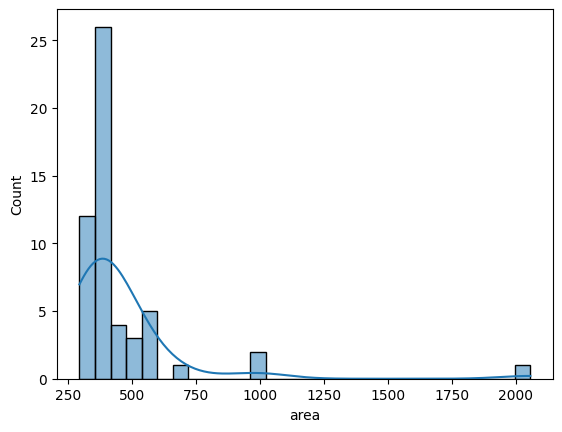

In [ ]:
sns.histplot(data=imovel, x="area", kde=True);

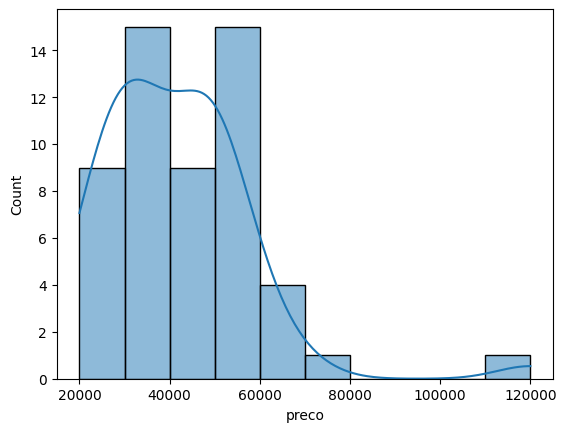

In [ ]:
sns.histplot(data=imovel, x="preco", kde=True);

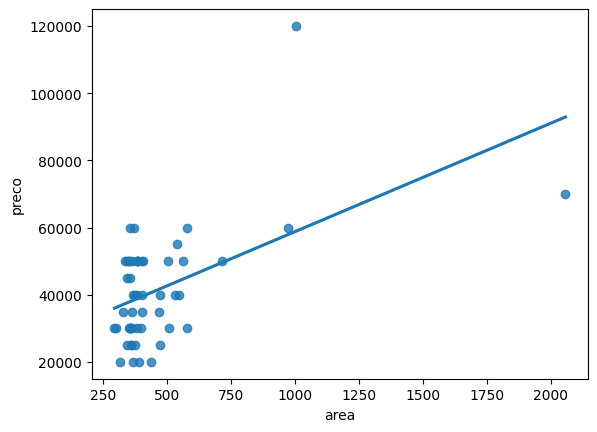

In [ ]:
sns.regplot(x = "area",
            y = "preco",
            ci = None,
            data = imovel);

In [ ]:
scaler = MinMaxScaler()
imovel_norm = pd.DataFrame(scaler.fit_transform(imovel), index=imovel.index, columns=imovel.columns)

In [ ]:
imovel_norm.head()

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


In [ ]:
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


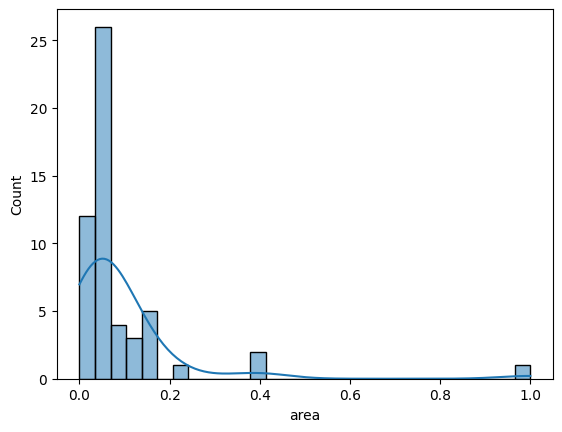

In [ ]:
sns.histplot(data=imovel_norm, x="area", kde=True);

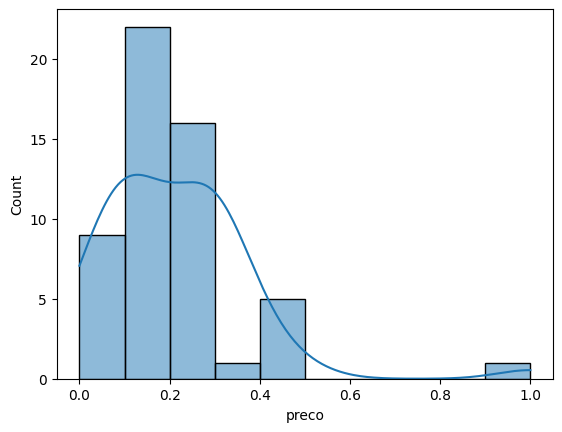

In [ ]:
sns.histplot(data=imovel_norm, x="preco", kde=True);

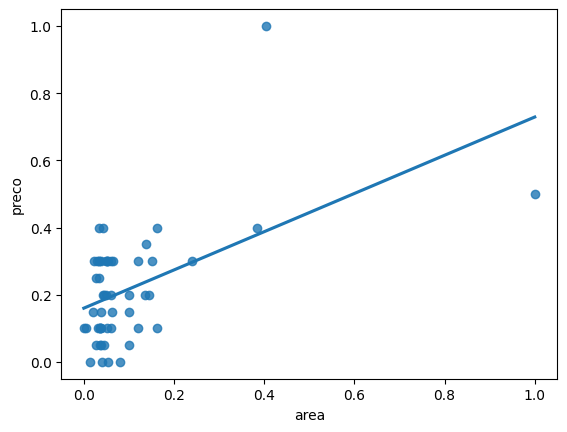

In [ ]:
sns.regplot(x = "area",
            y = "preco",
            ci = None,
            data = imovel_norm);

In [ ]:
scaler = StandardScaler()
limite_std = pd.DataFrame(scaler.fit_transform(imovel), index=imovel.index, columns=imovel.columns)

In [ ]:
limite_std.head()

,area,preco
0,-0.376749,-0.997620
1,-0.402801,0.226732
2,-0.446145,0.226732
3,-0.082956,-1.303707
4,-0.446608,-0.997620


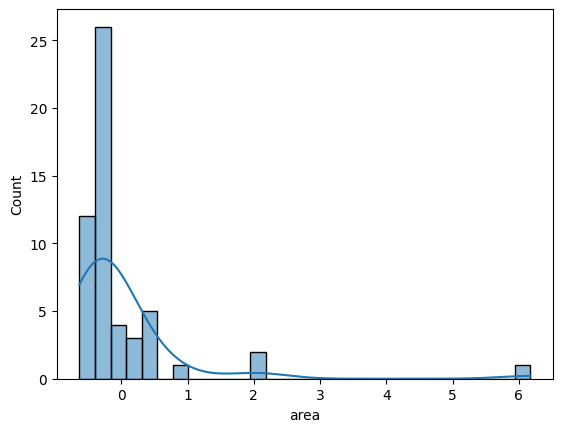

In [ ]:
sns.histplot(limite_std, x="area", kde=True);

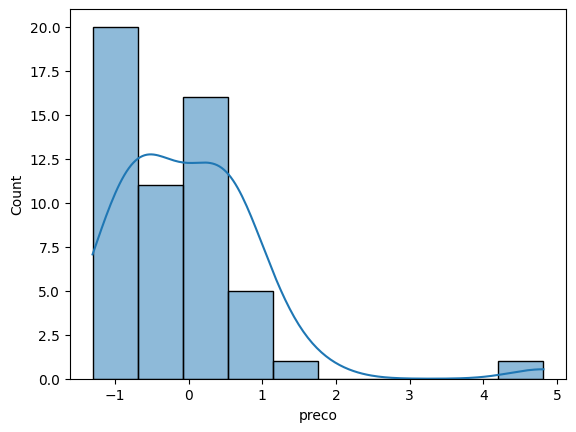

In [ ]:
sns.histplot(limite_std, x="preco", kde=True);

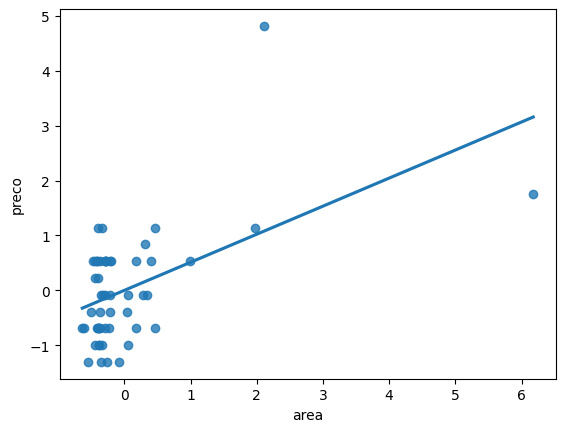

In [ ]:
sns.regplot(x = "area",
            y = "preco",
            ci = None,
            data = limite_std);

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function = 'preco~area-1'
model = smf.ols(formula=function, data=limite_std).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  preco   R-squared (uncentered):                   0.262
Model:                            OLS   Adj. R-squared (uncentered):              0.248
Method:                 Least Squares   F-statistic:                              18.77
Date:                Fri, 28 Feb 2025   Prob (F-statistic):                    6.61e-05
Time:                        21:17:02   Log-Likelihood:                         -68.438
No. Observations:                  54   AIC:                                      138.9
Df Residuals:                      53   BIC:                                      140.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
x = limite_std[["area"]]

y = limite_std[["preco"]]

In [ ]:
#Separando os dados de Treino e Teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Criando um Objeto de Regressão Linear
lr = LinearRegression()

#Treinando o Modelo
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
r_sq = lr.score(x, y)
print('Coeficiente de Determinação (R²):', r_sq)

Coeficiente de Determinação (R²): 0.2605855251089534


In [ ]:
y_pred_train = lr.predict(x_train)
print('MAE:', metrics.mean_absolute_error(y_train, y_pred_train))
print('MSE:', metrics.mean_squared_error(y_train, y_pred_train))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

MAE: 0.6779196341565954
MSE: 0.8240992438856338
RMSE: 0.907799120888335


In [ ]:
y_pred = lr.predict(x_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.5875238490475696
MSE: 0.40837401427584186
RMSE: 0.639041480872597


# Classificação

Os modelos de classificação em Machine Learning são algoritmos utilizados para categorizar dados em diferentes classes ou categorias com base em padrões identificados nos dados de treinamento. Esse tipo de modelo é amplamente aplicado em diversas áreas, como diagnóstico médico, detecção de fraudes, reconhecimento de imagens e análise de sentimentos.

A principal característica de um modelo de classificação é sua capacidade de aprender a relação entre variáveis de entrada (features) e a variável de saída (rótulo ou classe). Durante a fase de treinamento, o modelo analisa um conjunto de dados rotulados e ajusta seus parâmetros para minimizar erros de predição. Posteriormente, ele pode ser testado em novos dados para avaliar sua capacidade de generalização.
Os algoritmos de classificação podem ser divididos em diferentes categorias. Entre os mais populares estão: Regressão Logística, que apesar do nome é usada para classificação binária; Árvores de Decisão, que criam regras interpretáveis para classificar dados; Random Forest, um conjunto de várias árvores que melhora a precisão; Support Vector Machines (SVM), que encontra um hiperplano ótimo para separação de classes; e Redes Neurais Artificiais, que modelam relações complexas entre os dados.
Para avaliar a eficácia de um modelo de classificação, métricas como acurácia, precisão, recall e F1-score são utilizadas. Além disso, técnicas como validação cruzada e ajuste de hiperparâmetros ajudam a otimizar o desempenho do modelo e evitar problemas como overfitting (quando o modelo se ajusta excessivamente aos dados de treinamento e perde capacidade de generalização).
Em suma, os modelos de classificação são fundamentais para resolver problemas que exigem a categorização automática de dados, sendo um dos pilares do aprendizado de máquina supervisionado.

# Exemplo prático

Temos um dataset de uma empresa de streaming que quer avaliar os clientes que tem probabilidade de ser churn.

In [4]:
df = pd.read_csv('streaming_data.csv')
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [5]:
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [7]:
df.shape

(77884, 10)

In [8]:
df_missing = (
  df.isna().sum()
  .to_frame('missing_values')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_values', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_values,missing_pct
Num_streaming_services,68312,87.71%
Subscription_type,25221,32.38%
Devices_connected,25188,32.34%
Time_on_platform,21420,27.50%
Avg_rating,17270,22.17%
Churned,16736,21.49%
Gender,14516,18.64%
Age,11277,14.48%
Num_active_profiles,0,0.00%
User_id,0,0.00%


In [9]:
df[df.isna().any(axis=1)]

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f
5,54.0,Male,3024.0,2.0,Basic,NaN,1,NaN,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9
...,...,...,...,...,...,...,...,...,...,...
77879,45.0,Male,NaN,NaN,Basic,NaN,5,2.20,0.0,6b51fe0d-d4a1-41ed-a55c-d05f5c961e3c
77880,47.0,Female,6176.0,NaN,Premium,NaN,2,4.54,0.0,59d70167-6be0-474c-b71e-14153205b44f
77881,64.0,Female,NaN,5.0,Premium,NaN,1,4.34,1.0,a7d5ed26-78a4-4e70-bd04-0fec883e56aa
77882,58.0,Male,1314.0,5.0,Standard,NaN,4,NaN,0.0,472e9e70-87ca-4c5e-bfee-fa9f42b54f51


In [10]:
colunas_nulas = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
df[colunas_nulas] = df[colunas_nulas].fillna(0)

In [11]:
df.dropna(inplace=True)
df.head(20)

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9
9,21.0,Female,112.0,2.0,Basic,0.0,3,2.57,1.0,c6f0b9be-dd53-42a3-8efd-1ad7dcdda167
11,61.0,Male,5389.0,3.0,Standard,0.0,4,3.92,0.0,8f62edd7-4fe0-45c2-98b9-2951e4bef897
14,44.0,Male,4198.0,1.0,Basic,0.0,3,2.59,0.0,5417ca3a-b300-4429-b227-3bc75fbb2c1d
15,30.0,Male,2306.0,3.0,Premium,0.0,5,3.95,0.0,cc4de3a2-a732-42f1-b55d-6e33886a3b7d
20,20.0,Male,2542.0,5.0,Basic,0.0,1,0.00,1.0,b4da071a-c8b4-44dd-84fb-7de32abf766f


In [12]:
df_missing = (
  df.isna().sum()
  .to_frame('missing_values')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_values', ascending=False)
)

df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_values,missing_pct
Age,0,0.00%
Gender,0,0.00%
Time_on_platform,0,0.00%
Devices_connected,0,0.00%
Subscription_type,0,0.00%
Num_streaming_services,0,0.00%
Num_active_profiles,0,0.00%
Avg_rating,0,0.00%
Churned,0,0.00%
User_id,0,0.00%


In [13]:
df['Churned'] = df['Churned'].replace({0.0: 'No', 1.0: 'Yes'})
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [14]:
df = df.astype({'Age':'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36515 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     36515 non-null  int64  
 1   Gender                  36515 non-null  object 
 2   Time_on_platform        36515 non-null  float64
 3   Devices_connected       36515 non-null  float64
 4   Subscription_type       36515 non-null  object 
 5   Num_streaming_services  36515 non-null  float64
 6   Num_active_profiles     36515 non-null  int64  
 7   Avg_rating              36515 non-null  float64
 8   Churned                 36515 non-null  object 
 9   User_id                 36515 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 3.1+ MB


In [15]:
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [16]:
churn_agg = df.groupby("Churned")['User_id'].count().reset_index()
churn_agg = pd.DataFrame(churn_agg)
churn_agg

,Churned,User_id
0,No,29459
1,Yes,7056


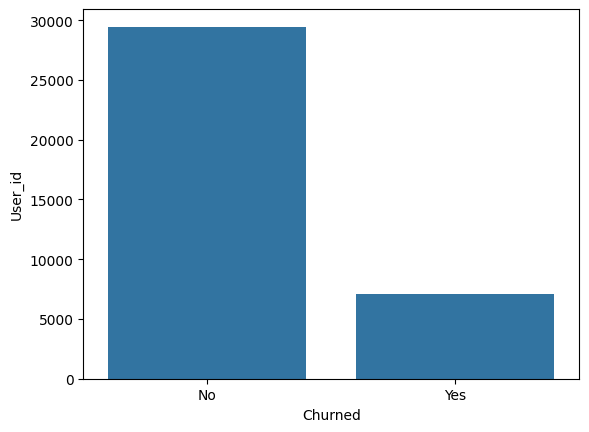

In [18]:
sns.barplot(data=churn_agg, x = "Churned",y = "User_id");

In [19]:
churn_sub = df.groupby("Subscription_type")['User_id'].count().reset_index()
churn_sub = pd.DataFrame(churn_sub)
churn_sub

,Subscription_type,User_id
0,Basic,12134
1,Premium,12224
2,Standard,12157


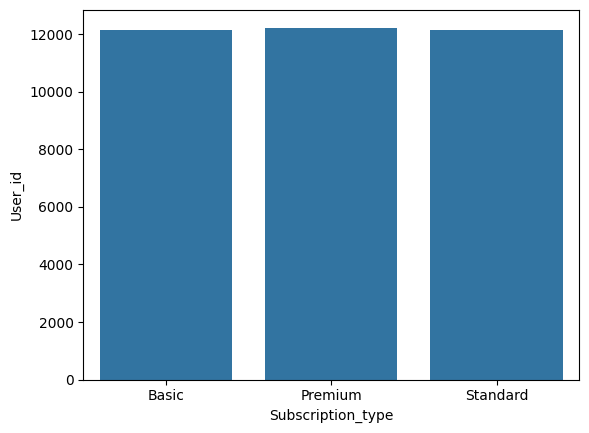

In [20]:
sns.barplot(data=churn_sub, x = "Subscription_type",y = "User_id");

In [21]:
churn_agg_gender = df.groupby("Gender")['User_id'].count().reset_index()
churn_agg_gender = pd.DataFrame(churn_agg_gender)
churn_agg_gender;

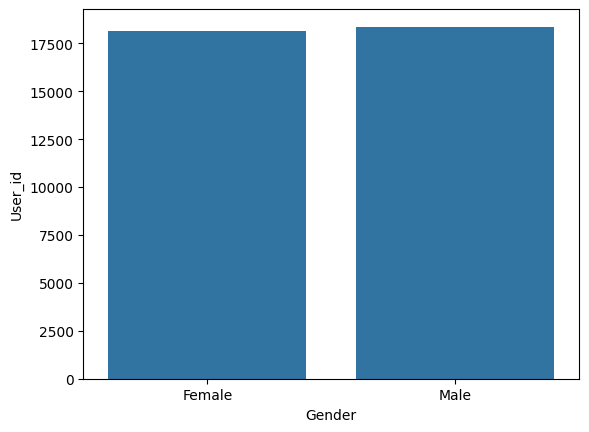

In [22]:
sns.barplot(data=churn_agg_gender, x = "Gender",y = "User_id");

In [23]:
churn_agg_pgt = df.groupby(["Churned","Subscription_type"])['User_id'].count().reset_index()
churn_agg_pgt.head()

,Churned,Subscription_type,User_id
0,No,Basic,9746
1,No,Premium,9866
2,No,Standard,9847
3,Yes,Basic,2388
4,Yes,Premium,2358


In [29]:
x = df.drop(columns=["User_id","Churned"], axis=1)

y = df[["Churned"]]

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churned)
y.Churn = le.transform(y.Churned);

In [32]:
x = pd.get_dummies(x)
y = pd.Series(le.transform(df['Churned']), name='Churned')

In [33]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x = pd.DataFrame(mm.fit_transform(x))

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf =  RandomForestClassifier()

In [36]:
parameters = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'n_estimators': [100, 300, 500]}

grid_search = GridSearchCV(rf, parameters, scoring='roc_auc', cv=5, n_jobs=-1)

In [37]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 300, 500]},
             scoring='roc_auc')

In [38]:
results = pd.DataFrame(grid_search.cv_results_)
results.sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
28,9.691148,0.552414,0.294010,0.086604,10,300,"{'max_depth': 10, 'n_estimators': 300}",0.589943,0.595734,0.581998,0.591892,0.590256,0.589965,0.004485,1
29,15.769774,1.399122,0.439054,0.118532,10,500,"{'max_depth': 10, 'n_estimators': 500}",0.591256,0.591485,0.578072,0.586969,0.590480,0.587653,0.005058,2
27,3.443688,0.428445,0.120783,0.040495,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.591562,0.586545,0.579883,0.586567,0.582513,0.585414,0.003985,3
26,15.171095,0.418684,0.447761,0.130885,9,500,"{'max_depth': 9, 'n_estimators': 500}",0.572576,0.573368,0.564273,0.574838,0.578933,0.572798,0.004793,4
25,9.199110,0.509168,0.226210,0.007204,9,300,"{'max_depth': 9, 'n_estimators': 300}",0.572527,0.570748,0.567126,0.574384,0.577561,0.572469,0.003496,5


In [39]:
grid_search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [40]:
rf =  RandomForestClassifier(bootstrap = True,
 ccp_alpha = 0.0,
 class_weight = None,
 criterion = 'gini',
 max_depth = 10,
 max_features = 'sqrt',
 max_leaf_nodes = None,
 max_samples = None,
 min_impurity_decrease = 0.0,
 min_samples_leaf = 1,
 min_samples_split = 2,
 min_weight_fraction_leaf = 0.0,
 monotonic_cst = None,
 n_estimators = 500,
 n_jobs = None,
 oob_score = False,
 random_state = None,
 verbose = 0,
 warm_start = False)

In [41]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=500)

In [42]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, rf.predict(x_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, rf.predict(x_train))}")
print(f"Precision (Teste): {precision_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, rf.predict(x_train))}")
print(f"Recall (Teste): {recall_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, rf.predict(x_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, rf.predict(x_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, rf.predict_proba(x_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, rf.predict_proba(x_test)[:,1])}")

Acurácia (Treino): 0.8076133095987951
Acurácia (Teste): 0.8067917294262632
Acurácia Balanceada (Treino): 0.5022143489813995
Acurácia Balanceada (Teste): 0.5
Precision (Treino): 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision (Teste): 0.0
Recall (Treino): 0.0044286979627989375
Recall (Teste): 0.0
F1-Score (Treino): 0.008818342151675485
F1-Score (Teste): 0.0
ROCAUC (Treino): 0.9249607295304122
ROCAUC (Teste): 0.600584078256238
